In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [158]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel(xls, 'Transactions')
df2 = pd.read_excel(xls, 'NewCustomerList')
df3 = pd.read_excel(xls, 'CustomerDemographic')
df4 = pd.read_excel(xls, 'CustomerAddress')

In [159]:
df2['last_name'] =df2['last_name'].replace(np.nan, df2['first_name'])
df3['last_name'] =df3['last_name'].replace(np.nan, df3['first_name'])

In [160]:
df2['name']=df2['first_name']+' '+df2['last_name']
df3['name']=df3['first_name']+' '+df3['last_name']

In [161]:
df2['name'].dtype

dtype('O')

In [214]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,name
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.58,0.7250,0.90625,0.770312,1,1,1.718750,Chickie Brister
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,1.02,1.0200,1.27500,1.083750,1,1,1.718750,Morly Genery
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.98,0.9800,0.98000,0.980000,1,1,1.718750,Ardelis Forrester
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.80,1.0000,1.00000,1.000000,4,4,1.703125,Lucine Stutt
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.53,0.5300,0.66250,0.662500,4,4,1.703125,Melinda Hadlee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,1.01,1.0100,1.01000,1.010000,996,996,0.374000,Ferdinand Romanetti
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.67,0.6700,0.83750,0.711875,997,997,0.357000,Burk Wortley
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.59,0.7375,0.73750,0.737500,997,997,0.357000,Melloney Temby
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.55,0.6875,0.68750,0.584375,997,997,0.357000,Dickie Cubbini


In [213]:
df1['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [163]:
df3['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [164]:
#df2.join(df3, on=('name'), lsuffix='_df2', rsuffix='_df3')
pd.merge(df2, df3, how ='inner', on ='name') 

,first_name_x,last_name_x,gender_x,past_3_years_bike_related_purchases_x,DOB_x,job_title_x,job_industry_category_x,wealth_segment_x,deceased_indicator_x,owns_car_x,...,gender_y,past_3_years_bike_related_purchases_y,DOB_y,job_title_y,job_industry_category_y,wealth_segment_y,deceased_indicator_y,default,owns_car_y,tenure_y
0,Glyn,Glyn,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,...,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,18.0


In [165]:
#import sweetviz

In [166]:
df4=df3.copy()
df4.drop(['DOB'],axis=1,inplace=True)

In [167]:
df4.drop(['default'],axis=1,inplace=True)

In [168]:
#my_report=sweetviz.analyze([df4,'df4'],target_feat='past_3_years_bike_related_purchases')

In [169]:
#my_report.show_html('report.html')

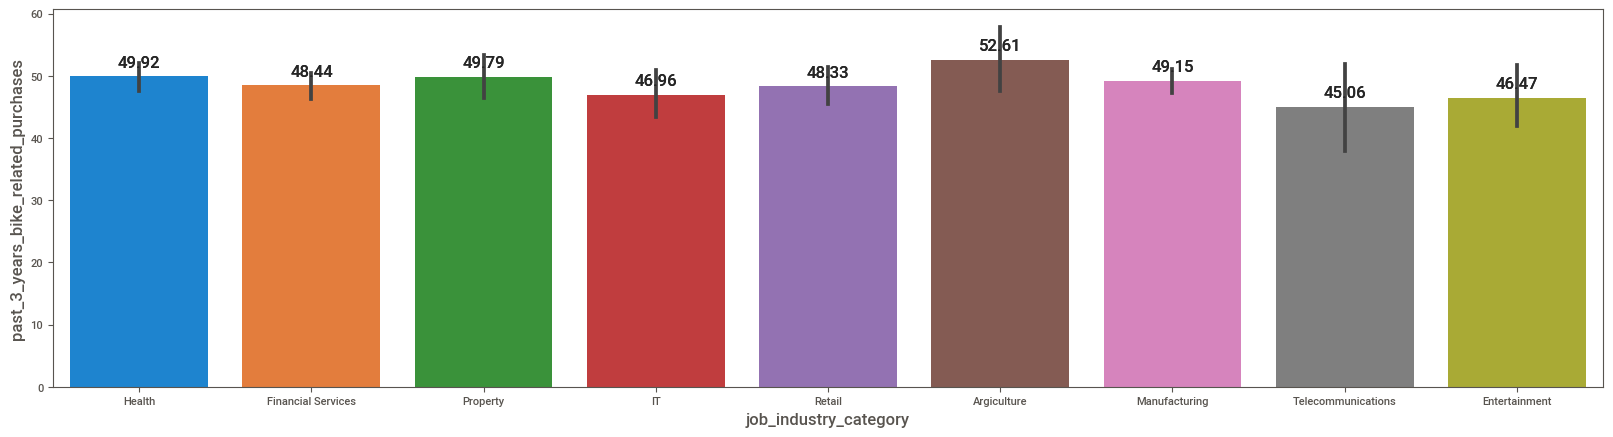

In [170]:

# the size of A4 paper
#plt.figure(figsize=(15,8))
sns.barplot(x=df3.job_industry_category, y=df3.past_3_years_bike_related_purchases)
splot = sns.barplot(data=df3, x = 'job_industry_category', y = 'past_3_years_bike_related_purchases', ci = None)
for p in splot.patches:
    

    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




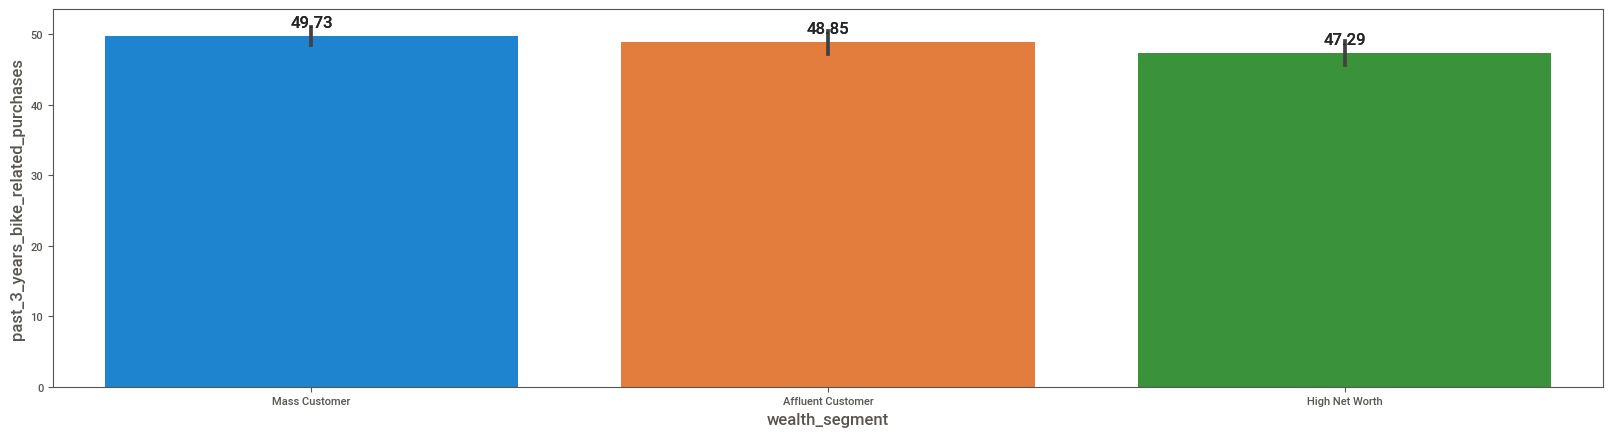

In [181]:
sns.barplot(x=df3.wealth_segment, y=df3.past_3_years_bike_related_purchases)
plt.rcParams['figure.figsize']=(5,5)
splot = sns.barplot(data=df3, x = 'wealth_segment', y = 'past_3_years_bike_related_purchases', ci = None)
for p in splot.patches:
    

    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




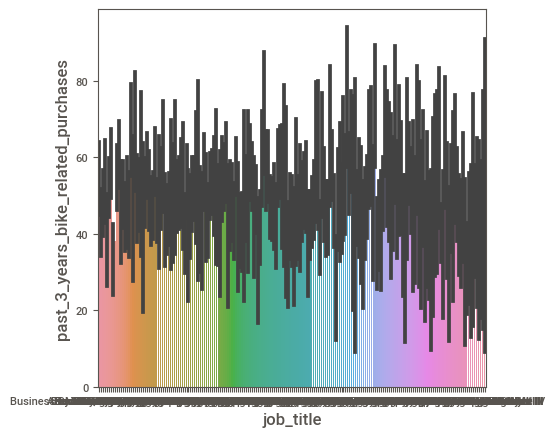

In [172]:
sns.barplot(x=df3.job_title, y=df3.past_3_years_bike_related_purchases)
plt.rcParams['figure.figsize']=(20,5)

In [173]:
df6=df3[df3['past_3_years_bike_related_purchases']>65]

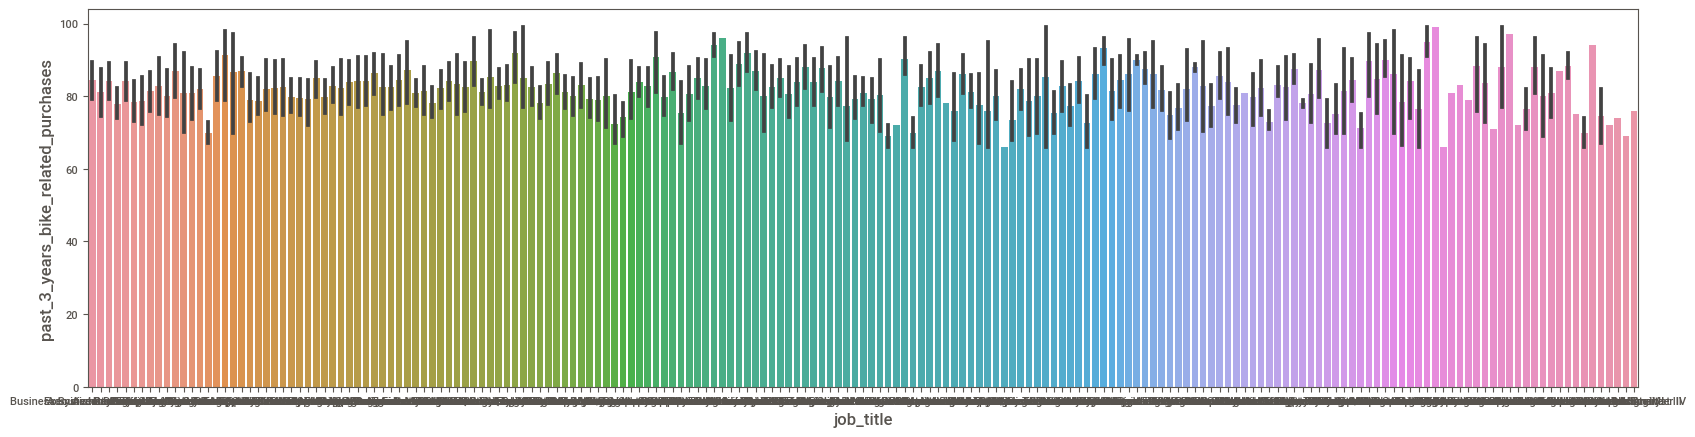

In [174]:
sns.barplot(x=df6.job_title, y=df6.past_3_years_bike_related_purchases)
plt.rcParams['figure.figsize']=(20,5)

In [179]:
df3['gender']=df3['gender'].replace('M','Male')
df3=df3.replace(to_replace =['F','Femal','female'],value ='Female')
df3['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

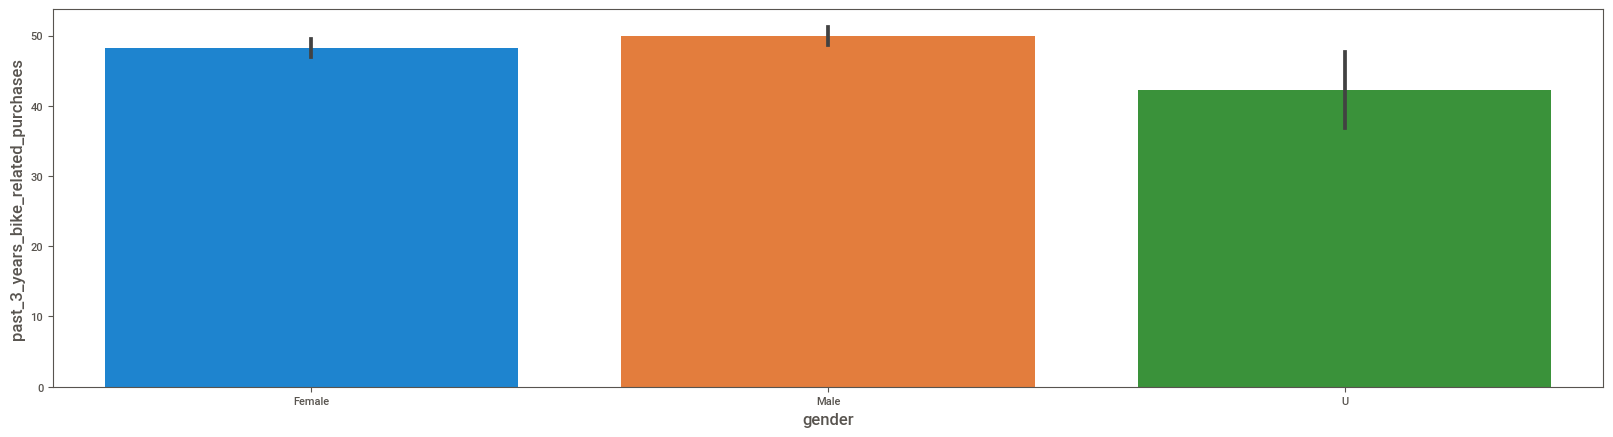

In [180]:
sns.barplot(x=df3.gender, y=df3.past_3_years_bike_related_purchases)
plt.rcParams['figure.figsize']=(20,5)

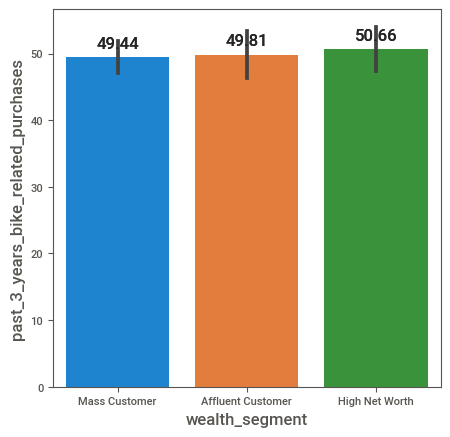

In [183]:
sns.barplot(x=df2.wealth_segment, y=df2.past_3_years_bike_related_purchases)
plt.rcParams['figure.figsize']=(5,5)
splot = sns.barplot(data=df2, x = 'wealth_segment', y = 'past_3_years_bike_related_purchases', ci = None)
for p in splot.patches:
    

    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




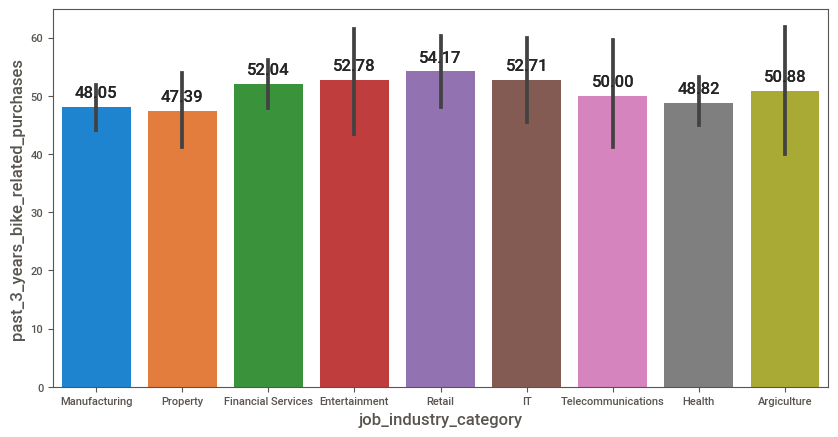

In [186]:
sns.barplot(x=df2.job_industry_category, y=df2.past_3_years_bike_related_purchases)
splot = sns.barplot(data=df2, x = 'job_industry_category', y = 'past_3_years_bike_related_purchases', ci = None)
plt.rcParams['figure.figsize']=(10,5)
for p in splot.patches:
    

    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




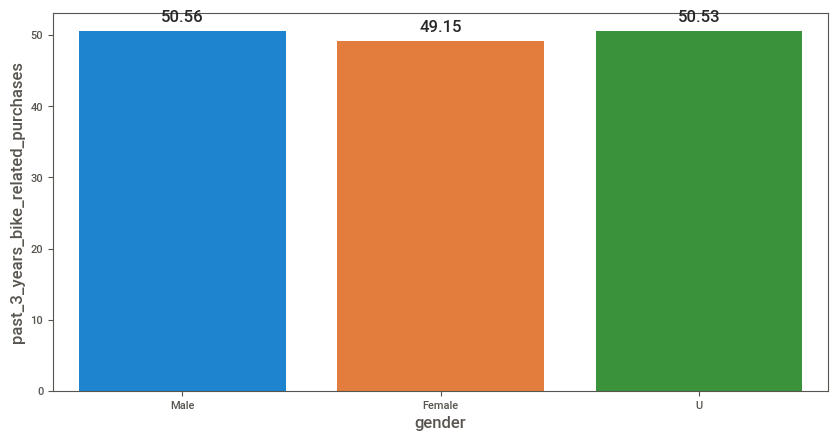

In [223]:
#sns.barplot(x=df2.gender, y=df2.past_3_years_bike_related_purchases)

#plt.rcParams['figure.figsize']=(20,5)
splot = sns.barplot(data=df2, x = 'gender', y = 'past_3_years_bike_related_purchases', ci = None)
plt.rcParams['figure.figsize']=(10,5)
for p in splot.patches:
    

    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [219]:
df10=df2[['job_industry_category','wealth_segment','gender','past_3_years_bike_related_purchases']]
df10

,job_industry_category,wealth_segment,gender,past_3_years_bike_related_purchases
0,Manufacturing,Mass Customer,Male,86
1,Property,Mass Customer,Male,69
2,Financial Services,Affluent Customer,Female,10
3,Manufacturing,Affluent Customer,Female,64
4,Financial Services,Affluent Customer,Female,34
...,...,...,...,...
995,Financial Services,Affluent Customer,Male,60
996,Health,Mass Customer,Male,22
997,Financial Services,Affluent Customer,Female,17
998,Financial Services,Mass Customer,Male,30


In [221]:
gk = df10.groupby(['job_industry_category','wealth_segment','gender']).count()
gk

past_3_years_bike_related_purchases
job_industry_category wealth_segment    gender                                     
Argiculture           Affluent Customer Female                                    1
                                        Male                                      4
                      High Net Worth    Female                                    2
                      Mass Customer     Female                                    7
                                        Male                                     12
Entertainment         Affluent Customer Female                                    4
                                        Male                                      2
                                        U                                         1
                      High Net Worth    Female                                    8
                                        Male                                      7
                      Mass Customer     Female                                    8
                                        Male                                      7
Financial Services    Affluent Customer Female                                   24
                                        Male                                     27
                                        U                                         1
                      High Net Worth    Female                                   22
                                        Male                                     22
                      Mass Customer     Female                                   64
                                        Male                                     43
Health                Affluent Customer Female                                   17
                                        Male                                     21
                      High Net Worth    Female                                   27
                                        Male                                     14
                      Mass Customer     Female                                   37
                                        Male                                     36
IT                    Affluent Customer Female                                    3
                                        Male                                      6
                                        U                                         4
                      High Net Worth    Female                                    3
                                        Male                                      3
                                        U                                         2
                      Mass Customer     Female                                   12
                                        Male                                      9
                                        U                                         9
Manufacturing         Affluent Customer Female                                   26
                                        Male                                     25
                      High Net Worth    Female                                   30
                                        Male                                     31
                      Mass Customer     Female                                   41
                                        Male                                     46
Property              Affluent Customer Female                                    8
                                        Male                                      6
                      High Net Worth    Female                                    8
                                        Male                                      5
                      Mass Customer     Female                                   19
                                        Male                                     18
Retail          

In [216]:
gk['past_3_years_bike_related_purchases'].sum()

835

In [217]:
gk1 = df10.groupby(['gender']).count()
gk1

,job_industry_category,wealth_segment,past_3_years_bike_related_purchases
gender,,,
Female,428,513,513
Male,390,470,470
U,17,17,17


In [206]:
tele=df10[df10['job_industry_category']=='Telecommunications']
agri=df10[df10['job_industry_category']=='Argiculture']
IT=df10[df10['job_industry_category']=='IT']
Retail=df10[df10['job_industry_category']=='Retail']
Entertainment=df10[df10['job_industry_category']=='Entertainment']
Financial_Services=df10[df10['job_industry_category']=='Financial Services']

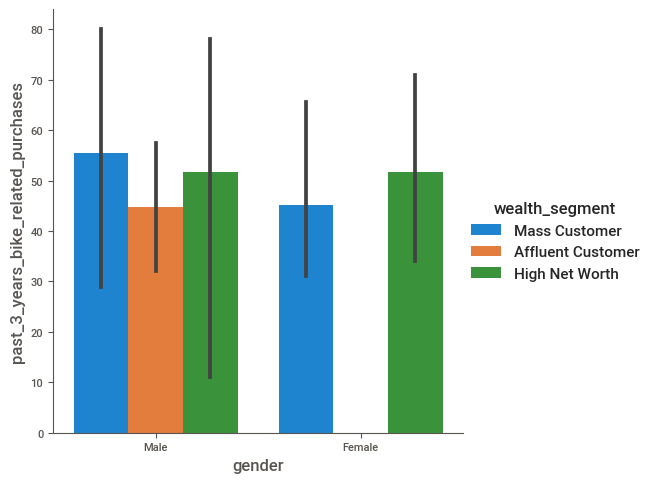

In [203]:
#agri
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=agri);


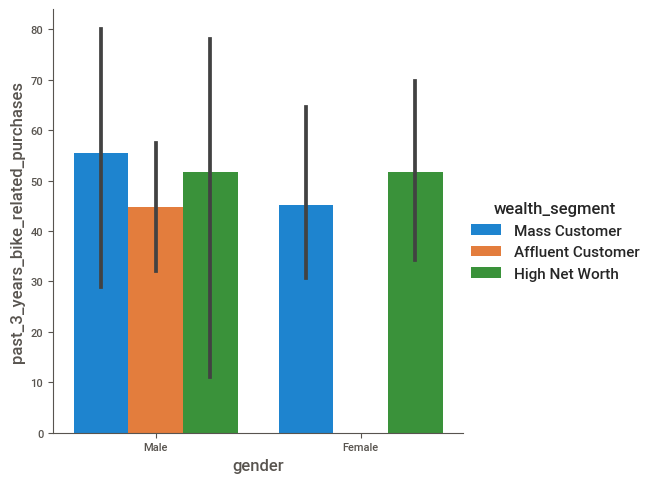

In [207]:
#tele
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=tele);


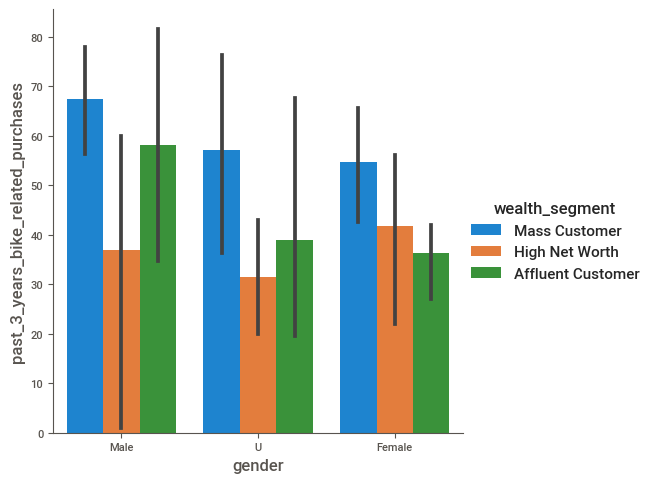

In [208]:
#IT
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=IT);

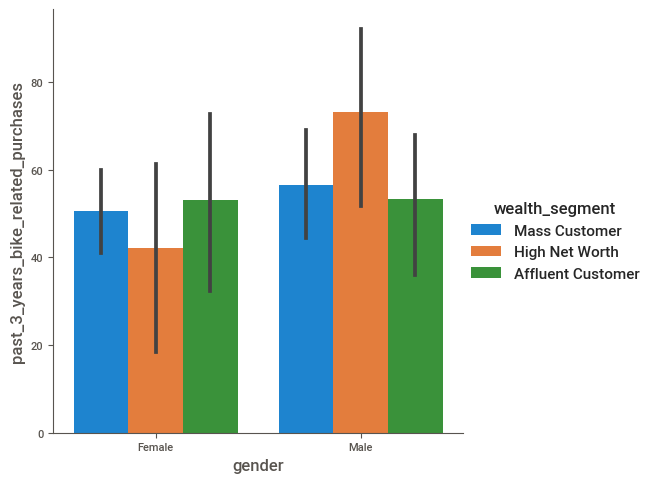

In [209]:
#Retail
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=Retail);

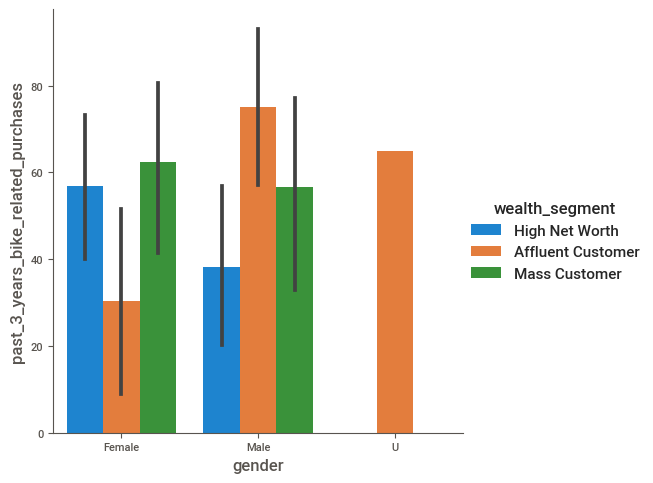

In [210]:
#Entertainment
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=Entertainment);


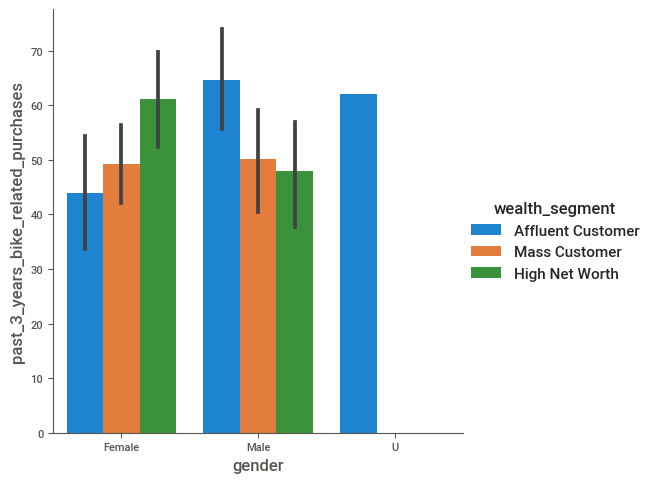

In [211]:
#Financial_Services
sns.catplot(x="gender", y="past_3_years_bike_related_purchases",hue = "wealth_segment", kind="bar", data=Financial_Services);


In [226]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,name
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.58,0.7250,0.90625,0.770312,1,1,1.718750,Chickie Brister
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,1.02,1.0200,1.27500,1.083750,1,1,1.718750,Morly Genery
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.98,0.9800,0.98000,0.980000,1,1,1.718750,Ardelis Forrester
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.80,1.0000,1.00000,1.000000,4,4,1.703125,Lucine Stutt
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.53,0.5300,0.66250,0.662500,4,4,1.703125,Melinda Hadlee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,1.01,1.0100,1.01000,1.010000,996,996,0.374000,Ferdinand Romanetti
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.67,0.6700,0.83750,0.711875,997,997,0.357000,Burk Wortley
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.59,0.7375,0.73750,0.737500,997,997,0.357000,Melloney Temby
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.55,0.6875,0.68750,0.584375,997,997,0.357000,Dickie Cubbini


In [225]:
df2['past_3_years_bike_related_purchases'].sum()


49836

In [232]:
gen=df2[['gender','past_3_years_bike_related_purchases']]
gen[gen['gender']=='Male'].sum()

gender                                 MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...
past_3_years_bike_related_purchases                                                23765
dtype: object

In [235]:
w=df2[['wealth_segment','past_3_years_bike_related_purchases']]
w

,wealth_segment,past_3_years_bike_related_purchases
0,Mass Customer,86
1,Mass Customer,69
2,Affluent Customer,10
3,Affluent Customer,64
4,Affluent Customer,34
...,...,...
995,Affluent Customer,60
996,Mass Customer,22
997,Affluent Customer,17
998,Mass Customer,30


In [237]:
w[w['wealth_segment']=='Mass Customer'].sum()

wealth_segment                         Mass CustomerMass CustomerMass CustomerMass Cu...
past_3_years_bike_related_purchases                                                25115
dtype: object

In [238]:
w[w['wealth_segment']=='Affluent Customer'].sum()

wealth_segment                         Affluent CustomerAffluent CustomerAffluent Cus...
past_3_years_bike_related_purchases                                                12005
dtype: object

In [239]:
w[w['wealth_segment']=='High Net Worth'].sum()

wealth_segment                         High Net WorthHigh Net WorthHigh Net WorthHigh...
past_3_years_bike_related_purchases                                                12716
dtype: object